In [1]:
%pylab inline
import numpy as np
import pandas as pd
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


# PGA dataset

In [2]:
res = pd.read_csv("result_final.csv")
res

,URL,SIVA_FILENAMES,FILE_COUNT,LANGS,LANGS_BYTE_COUNT,LANGS_LINES_COUNT,LANGS_FILES_COUNT,COMMITS_COUNT,BRANCHES_COUNT,FORK_COUNT,EMPTY_LINES_COUNT,CODE_LINES_COUNT,COMMENT_LINES_COUNT,LICENSE
0,https://github.com/powmedia/buildify,4a14cc02da0a9280538cd3f3242365601d72f241.siva,12,"JSON,JavaScript,Markdown,Text","653,18611,4669,1094","29,849,216,22","1,5,1,4",38,25,0,"0,190,67,0","28,474,148,0","0,161,0,0","JSON:0.757,MIT:0.905,MIT-feh:0.479"
1,https://github.com/leon/play-salat,ee02fdfc0942ff17949f456d6ee3a27b976b7141.siva,53,"CSS,HTML,INI,Markdown,Scala,YAML","12981,692,38,12388,34281,132","114,30,4,343,1056,16","1,3,2,19,19,1",104,74,0,"0,4,0,79,156,4","113,25,0,248,766,11","0,0,0,0,102,0",NaN
2,https://github.com/adammark/Markup.js,00e71912d4ec215337d5d959a34ab0ce44fdd3b4.siva,22,"CSS,HTML,JSON,JavaScript,Markdown,Shell","6537,11414,678,182203,30807,91","83,492,30,5600,1204,5","1,2,1,13,1,1",295,30,0,"2,91,0,857,347,0","80,395,29,3726,857,0","0,4,0,1008,0,0",NaN
3,https://github.com/heroku/heroku-buildpack-scala,eb7aa1e50236c65bf44529ebb9a75fae68e1d6b0.siva,33,"JSON,Markdown,Ruby,Scala,Shell,Text,YAML","585,5528,6850,494,69595,1070,711","23,160,229,22,2425,10,32","1,2,5,2,18,1,2",560,206,0,"0,58,19,2,0,0,1","22,100,112,18,0,0,29","0,0,8,0,0,0,0","JSON:0.747,MIT:0.914"
4,https://github.com/brandonwamboldt/utilphp,"993cc5b5ca2603f06a82555df151fbb398114543.siva,...",12,"JSON,Markdown,PHP,XML,YAML","723,13409,157618,714,342","25,337,3986,26,23","1,5,3,1,1",267,112,0,"0,91,548,0,4","24,242,2505,0,18","0,0,930,0,0","JSON:0.667,MIT:0.817"
5,https://github.com/tias/xinput_calibrator,ecb5809790cb86afa70e958bf19d2b968a8981c7.siva,41,"C++,M4Sugar,Makefile,Roff,SVG,Shell,Text,XPM,d...","131506,3532,5289,3856,59761,3632,1676,5956,300","3729,104,145,121,1374,120,42,268,12","22,1,6,1,1,3,1,1,1",201,72,0,"407,0,14,0,0,0,0,0,0","1945,0,48,0,0,0,0,0,0","575,0,77,0,0,0,0,0,0",NaN
6,https://github.com/substack/node-mkdirp,284bc24eaafca75786c7e86f1da66ad61adacdb7.siva,23,"JSON,JavaScript,Markdown,Text,YAML","556,16978,2095,1456,132","28,614,101,35,11","1,18,1,2,1",82,158,0,"0,75,37,0,0","27,470,63,0,10","0,18,0,0,0","JSON:0.591,MIT:0.735"
7,https://github.com/CakeDC/recaptcha,f4c4682073fcc4c67b38583594d73a880d648934.siva,24,"Gettext Catalog,JSON,Markdown,PHP,Text,YAML","9900,741,5861,25408,1243,936","246,28,178,1006,24,46","6,1,6,8,1,1",114,53,0,"0,0,54,123,0,7","0,27,120,397,0,38","0,0,0,479,0,0",MIT:0.773
8,https://github.com/luislavena/rake-compiler,28e938cf837c6859197000cc647f84f92668f0b6.siva,46,"Gherkin,RDoc,Ruby,Text,YAML","10680,15682,87905,14012,802","258,439,2783,433,43","8,1,30,2,3",432,116,1,"29,0,467,0,1","221,0,1970,0,39","0,0,241,0,0","JSON:0.769,MIT:0.911,MIT-feh:0.497"
9,https://github.com/be9/acl9,b54c2cb6363f42394b25028d3dbde6930ad8c7ed.siva,130,"Markdown,Ruby,Text,YAML","16487,115102,1072,1524","487,4216,10,73","3,113,1,3",192,81,0,"147,735,0,7","337,2734,0,34","0,440,0,29","JSON:0.780,MIT:0.942"


In [3]:
print("Number of rows :", len(res))

siva_files = set()
for row_siva in res["SIVA_FILENAMES"]:
    try:
        siva_files.update(row_siva.split(","))
    except AttributeError: 
        continue
        
print("Number of siva files :", len(siva_files))

Number of rows : 182014
Number of siva files : 248043


# Number of forks

In [4]:
total_fork_count = res["FORK_COUNT"].sum()
print("Number of forks :", total_fork_count)

Number of forks : 59246


# Number of languages

In [5]:
langs = set()
for row_langs in res["LANGS"]:
    try:
        langs.update(row_langs.split(","))
    except AttributeError: 
        continue
print("Number of languages :", len(langs))

Number of languages : 455


# Quantity per language

In [6]:
langs_bytes = defaultdict(int)
langs_lines = defaultdict(int)
langs_files = defaultdict(int)

for i in range(len(res)):
    row = res.iloc[i]
    try:
        langs = row.LANGS.split(",")
        langs_bytes_count = row.LANGS_BYTE_COUNT.split(",")
        langs_lines_count = row.LANGS_LINES_COUNT.split(",")
        langs_files_count = row.LANGS_FILES_COUNT.split(",")

        for l in langs:
            langs_bytes[l] += int(langs_bytes_count[langs.index(l)])
            langs_lines[l] += int(langs_lines_count[langs.index(l)])
            langs_files[l] += int(langs_files_count[langs.index(l)])
    except AttributeError: 
        continue

In [9]:
langs_files["Python"]

1723909

In [10]:
results = []
for lang, _ in langs_files.items():
    results.append((lang, langs_files[lang], langs_lines[lang], langs_bytes[lang]))
results[:10]

[('JSON', 2162977, 803822559, 69766435359),
 ('JavaScript', 5646092, 1880501462, 90695294715),
 ('Markdown', 1909045, 246884912, 10964388083),
 ('Text', 1996067, 1488675189, 57327600043),
 ('CSS', 630309, 221639211, 10009626571),
 ('HTML', 2521375, 590586404, 33904172085),
 ('INI', 390162, 27116506, 1296572847),
 ('Scala', 246700, 26478221, 964267204),
 ('YAML', 499916, 107465965, 4171150124),
 ('Shell', 618496, 150419813, 4716299253)]

In [11]:
df_langs = pd.DataFrame(results, columns=["LANGS", "FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"])
df_langs = df_langs.drop([0,2,3,4,5,12,17])
df_langs.head()

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
1,JavaScript,5646092,1880501462,90695294715
6,INI,390162,27116506,1296572847
7,Scala,246700,26478221,964267204
8,YAML,499916,107465965,4171150124
9,Shell,618496,150419813,4716299253


In [12]:
print("Total number of files :", df_langs["FILE_COUNT"].sum())
print("Total number of lines :", df_langs["LINE_COUNT"].sum())
print("Total number of bytes :", df_langs["BYTE_COUNT"].sum())

Total number of files : 40278107
Total number of lines : 11490817924
Total number of bytes : 461050434257


In [13]:
df_langs.sort_values("FILE_COUNT", ascending=False).head(10)


,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
26,C,5858304,2604668203,84782142152
1,JavaScript,5646092,1880501462,90695294715
13,C++,4281369,1242824287,44632927810
32,Java,4150873,648414582,23050951800
11,PHP,2077512,330805884,11374647733
27,Go,2025439,780429460,26346073405
28,Python,1723909,349453515,13091052924
35,Objective-C,1707177,163637882,5800866030
29,C#,1675869,283478830,10998958375
10,Ruby,928826,83603889,2687916843


### Normalization

In [14]:
values_type = ["FILE_COUNT", "LINE_COUNT", "BYTE_COUNT"]
for val_type in values_type:
    df_langs[val_type] /= df_langs[val_type].sum()
    
top10 = df_langs.sort_values("FILE_COUNT", ascending=False).head(10)
top10

,LANGS,FILE_COUNT,LINE_COUNT,BYTE_COUNT
26,C,0.145446,0.226674,0.183889
1,JavaScript,0.140178,0.163653,0.196714
13,C++,0.106295,0.108158,0.096807
32,Java,0.103055,0.056429,0.049997
11,PHP,0.051579,0.028789,0.024671
27,Go,0.050286,0.067918,0.057144
28,Python,0.042800,0.030412,0.028394
35,Objective-C,0.042385,0.014241,0.012582
29,C#,0.041607,0.024670,0.023856
10,Ruby,0.023060,0.007276,0.005830


# Visualization

## 1. LOC/files/bytes count - Top 10 Programming Languages

In [15]:
langs = list(top10["LANGS"])
langs

['C',
 'JavaScript',
 'C++',
 'Java',
 'PHP',
 'Go',
 'Python',
 'Objective-C',
 'C#',
 'Ruby']

In [16]:
values = [[] for _ in range(len(values_type))]
for i in range(len(langs)):
    for j, val_type in enumerate(values_type):
        values[j].append(top10.iloc[i][val_type]*100)

In [17]:
values[0]

[14.544635873776294,
 14.017769007863254,
 10.629518909615092,
 10.305531488855719,
 5.157918667826172,
 5.028635034908667,
 4.2800149470778255,
 4.238473769385438,
 4.1607441978343225,
 2.3060319095929707]

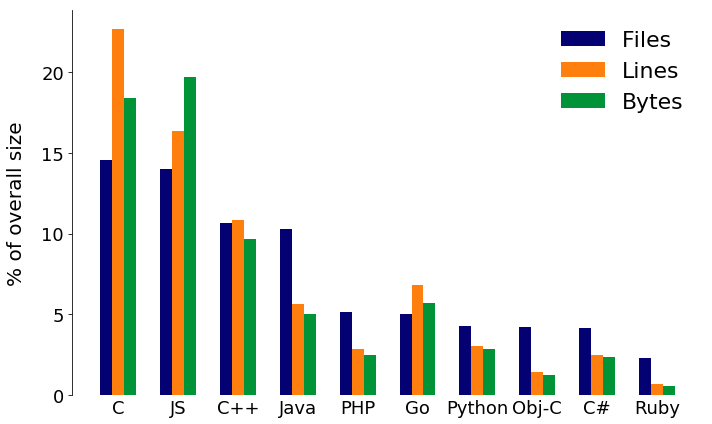

In [18]:
figure(figsize=(10, 6))
ax = subplot(111)

x = arange(1, 11)
ax.bar(x-0.2, values[0], width=0.2, align='center', color="#040273", label="Files")
ax.bar(x, values[1], width=0.2, align='center', color="#ff7f0e", label="Lines")
ax.bar(x+0.2, values[2], width=0.2, align='center', color="#009337", label="Bytes")

ax.set_xticks(x)
#print(dir(ax))
langs[1] = "JS"
langs[7] = "Obj-C"
ax.set_xticklabels(langs, fontsize=18)
ax.set_yticklabels([0,5,10,15,20], fontsize=18)
ax.tick_params(axis="y",length=4)
ax.tick_params(axis="x",length=0)
ax.set_ylabel("% of overall size", fontsize=20, labelpad=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

legend(fontsize=22).get_frame().set_linewidth(0.0)
tight_layout()
savefig("lang_stats.svg")

## 2. LOC/empty/comment count - Top 10 Programming Languages

In [19]:
langs_code = defaultdict(int)
langs_comment = defaultdict(int)
langs_empty = defaultdict(int)

for i in range(len(res)):
    row = res.iloc[i]
    try:
        langs_row = row.LANGS.split(",")
        langs_code_count = row.CODE_LINES_COUNT.split(",")
        langs_comment_count = row.COMMENT_LINES_COUNT.split(",")
        langs_empty_count = row.EMPTY_LINES_COUNT.split(",")

        for l in langs_row:
            langs_code[l] += int(langs_code_count[langs_row.index(l)])
            langs_comment[l] += int(langs_comment_count[langs_row.index(l)])
            langs_empty[l] += int(langs_empty_count[langs_row.index(l)])
    except AttributeError: 
        continue

In [23]:
langs = list(top10["LANGS"])

top10_lang_code = []
top10_lang_comment = []
top10_lang_empty = []
for l in langs:
    top10_lang_code.append(langs_code[l])
    top10_lang_comment.append(langs_comment[l])
    top10_lang_empty.append(langs_empty[l])

In [24]:
top10_lang_code

[1236398023,
 1123393487,
 506267314,
 396952631,
 199182113,
 552304123,
 206868296,
 49956728,
 188921975,
 54985249]

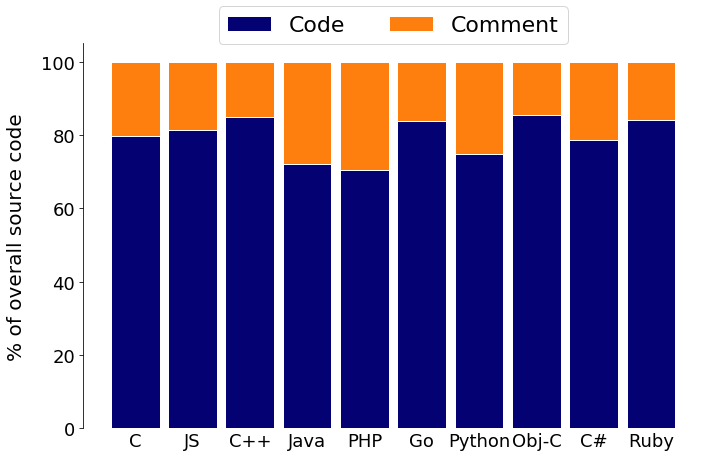

In [27]:
figure(figsize=(10, 6))
ax = subplot(111)

x = arange(1, 11)
raw_data = {'greenCode': top10_lang_code, 'orangeComment': top10_lang_comment}
df = pd.DataFrame(raw_data)
 
totals = [i+j for i,j in zip(df['greenCode'], df['orangeComment'])]
greenCode = [i / j * 100 for i,j in zip(df['greenCode'], totals)]
orangeComment = [i / j * 100 for i,j in zip(df['orangeComment'], totals)]
 
barWidth = 0.85
ax.bar(x, greenCode, color="#040273", edgecolor='white', width=barWidth, label="Code")
ax.bar(x, orangeComment, bottom=greenCode, color="#ff7f0e", edgecolor='white', width=barWidth, label="Comment")
 
ax.set_xticks(x)
langs[1] = "JS"
langs[7] = "Obj-C"
ax.tick_params(axis="y",length=4)
ax.tick_params(axis="x",length=0)
ax.set_ylabel("% of overall source code", fontsize=20, labelpad=15)
ax.set_xticklabels(langs, fontsize=18)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

legend(fontsize=22, bbox_to_anchor=(0,0.97,1,0), loc="lower center", ncol=2)
tight_layout()
savefig("lang_code_comment.svg")

## 3. Branches and Commits distribution

In [28]:
branches = []
commits = []
sizes = []
for i in range(len(res)):
    row = res.iloc[i]
    branches.append(row.BRANCHES_COUNT)
    commits.append(row.COMMITS_COUNT)
    if row.LANGS_BYTE_COUNT is not NaN:
        sizes.append(sum(int(i) for i in row.LANGS_BYTE_COUNT.split(",")))
    
branches = array(branches)
commits = array(commits)
sizes = array(sizes)

In [29]:
sizes_kb = sizes / 1000

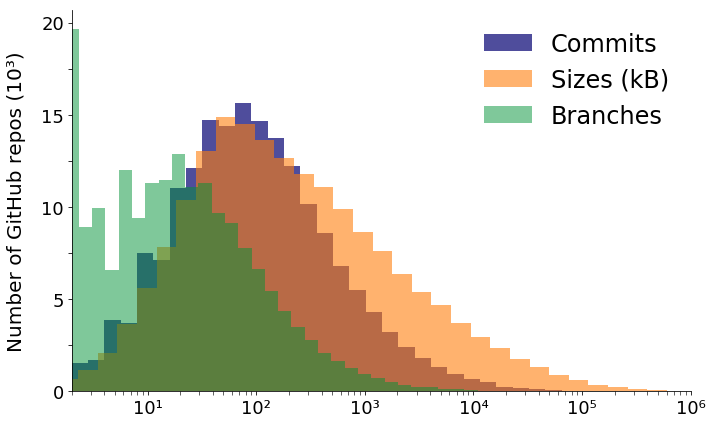

In [30]:
figure(figsize=(10, 6))
ax = subplot(111)

N_bins = 40
bins_log10_branches = np.logspace(np.log10(1), np.log10(branches.max()), N_bins)
bins_log10_commits = np.logspace(np.log10(commits.min()), np.log10(commits.max()), N_bins)
bins_log10_sizes = np.logspace(np.log10(1), np.log10(sizes_kb.max()), N_bins)

ax.hist(commits, bins_log10_commits, color="#040273", label='Commits', alpha=0.7)
ax.hist(sizes_kb, bins_log10_sizes, color="#ff7f0e", label='Sizes (kB)', alpha=0.6)
ax.hist(branches, bins_log10_branches, color="#009337", label='Branches', alpha=0.5)

ax.set_xscale('log')
ax.tick_params(axis='both', which='both',length=4)
ax.set_ylabel("Number of GitHub repos (10³)", fontsize=20, labelpad=15)

ax.set_xticklabels([0, 2, "10¹", "10²", "10³", "10⁴", "10⁵", "10⁶"], fontsize=18)
ax.set_yticklabels([0, "", 5, "", 10, "", 15, "", 20], fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(xmin=2, xmax=1000000)

legend(fontsize=24).get_frame().set_linewidth(0.0)
tight_layout()
savefig("branches_commits_sizes.svg")

## 4. Total number of licenses detected

In [31]:
licenses = []
for i in range(len(res)):
    row = res.iloc[i]
    if row.LICENSE is not NaN:
        licenses.append(row.LICENSE.split(","))

In [32]:
print(len(licenses))
licenses[0]

102897


['JSON:0.757', 'MIT:0.905', 'MIT-feh:0.479']

In [33]:
unique_licenses = set()
for lic in licenses:
    for l in lic:
        unique_licenses.add(l.split(":")[0])

In [35]:
len(unique_licenses)

289

## 6. Biggest repos

In [36]:
sizes_urls = {}
for i in range(len(res)):
    row = res.iloc[i]
    if row.LANGS_BYTE_COUNT is not NaN:
        sizes_urls[row.URL] = sum(int(i) for i in row.LANGS_BYTE_COUNT.split(","))

In [39]:
import operator

sorted_sizes = sorted(sizes_urls.items(), key=operator.itemgetter(1), reverse=True)
sorted_sizes[:20]

[('https://github.com/benbalter/dc-maps', 11109175583),
 ('https://github.com/jamesrobertlloyd/gp-structure-search', 6752715481),
 ('https://github.com/mirror/dd-wrt', 6602332086),
 ('https://github.com/jswanner/RailsDiff', 4629040286),
 ('https://github.com/DiseaseOntology/HumanDiseaseOntology', 4527018037),
 ('https://github.com/petewarden/openheatmap', 3645694471),
 ('https://github.com/Soren-Nordstrom/userscript', 3574568528),
 ('https://github.com/slashbeast/grsecurity-scrape', 3525224969),
 ('https://github.com/franksouza183/EvolvereSuit', 3289318194),
 ('https://github.com/RMerl/asuswrt-merlin.382', 2992403756),
 ('https://github.com/TransparencyToolkit/ICWATCH-Data', 2732868914),
 ('https://github.com/forkwikiman/enha', 2612378933),
 ('https://github.com/angular/code.angularjs.org', 2439644167),
 ('https://github.com/RMerl/asuswrt-merlin', 2325652559),
 ('https://github.com/bloomberg/chromium.bb', 2299747380),
 ('https://github.com/martinjc/UK-GeoJSON', 2291742271),
 ('https://

## 7. repos with the highest number of commits and branches

In [40]:
commits_urls = {}
branches_urls = {}
for i in range(len(res)):
    row = res.iloc[i]
    commits_urls[row.URL] = row.COMMITS_COUNT
    branches_urls[row.URL] = row.BRANCHES_COUNT

In [41]:
sorted_commits = sorted(commits_urls.items(), key=operator.itemgetter(1), reverse=True)
sorted_branches = sorted(branches_urls.items(), key=operator.itemgetter(1), reverse=True)

In [42]:
sorted_commits[:20]

[('https://github.com/altera-opensource/linux-socfpga', 735972),
 ('https://github.com/OpenChannelSSD/linux', 708228),
 ('https://github.com/google/capsicum-linux', 664239),
 ('https://github.com/ljalves/linux_media', 648041),
 ('https://github.com/rockchip-linux/kernel', 606698),
 ('https://github.com/libos-nuse/net-next-nuse', 604331),
 ('https://github.com/mjg59/linux', 588180),
 ('https://github.com/google/ktsan', 535479),
 ('https://github.com/NextThingCo/CHIP-linux', 533155),
 ('https://github.com/ARM-software/linux', 520275),
 ('https://github.com/emlid/linux-rt-rpi', 483438),
 ('https://github.com/linux-pmfs/pmfs', 389388),
 ('https://github.com/o11s/open80211s', 389354),
 ('https://github.com/sultanxda/android_kernel_oneplus_msm8974', 345781),
 ('https://github.com/MiCode/Xiaomi_Kernel_OpenSource', 339803),
 ('https://github.com/faux123/Nexus_5', 314209),
 ('https://github.com/mirrors/chromium', 260366),
 ('https://github.com/ChromiumWebApps/chromium', 260366),
 ('https://gith

In [43]:
sorted_branches[:20]

[('https://github.com/JetBrains/intellij-plugins', 59321),
 ('https://github.com/openstack/cinder', 48515),
 ('https://github.com/openstack/horizon', 44321),
 ('https://github.com/servo/servo', 43022),
 ('https://github.com/openstack/keystone', 38795),
 ('https://github.com/google/angle', 38327),
 ('https://github.com/openstack/heat', 37602),
 ('https://github.com/openstack/tempest', 36089),
 ('https://github.com/rust-lang/rust', 35094),
 ('https://github.com/deadlyvipers/dojo_rules', 31920),
 ('https://github.com/openstack/openstack-manuals', 31387),
 ('https://github.com/openstack-infra/project-config', 31236),
 ('https://github.com/openstack/ironic', 31037),
 ('https://github.com/openstack/fuel-web', 28081),
 ('https://github.com/ansible/ansible', 27741),
 ('https://github.com/jlord/patchwork', 27334),
 ('https://github.com/symfony/symfony', 26651),
 ('https://github.com/ceph/ceph', 25543),
 ('https://github.com/Juniper/contrail-controller', 25426),
 ('https://github.com/gromacs/gro